In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.colab import files

In [10]:
# Upload Excel file
uploaded = files.upload()
file_path = list(uploaded.keys())[0]
data = pd.ExcelFile(file_path)

Saving Alpha synuclein Log transformed.xlsx to Alpha synuclein Log transformed (1).xlsx


In [11]:
df = data.parse('Sheet1')

In [12]:
# Define conditions and colors
conditions = ['WT_D1_1', 'WT_D1_2', 'WT_D10_1', 'WT_D10_2', 'WT_D30_1', 'WT_D30_2', 'A30P_D1_1', 'A30P_D1_2', 'A30P_D10_1', 'A30P_D10_2', 'A53T_D1_1', 'A53T_D1_2', 'A53T_D10_1', 'A53T_D10_2', 'A53T_D30_1', 'A53T_D30_2']
num_conditions = len(conditions)

# Custom color palette (Choose your style)
colors = [
    '#1f77b4',  # WT_D1_1 (blue)
    '#2ca02c',  # WT_D1_2 (green)
    '#ff7f0e',  # WT_D10_1 (orange)
    '#9467bd',  # WT_D10_2  (purple)
    '#d62728',  # WT_D30_1 (red)
    '#8c564b',  # WT_D30_2 (brown)
    '#e377c2',  # A30P_D1_1 (pink)
    '#17becf',  # A30P_D1_2 (cyan)
    '#ff7f0e',  # A30P_D10_1 (orange)
    '#9467bd',  # A30P_D10_2 (purple)
    '#d62728',  # A53T_D1_1 (red)
    '#8c564b',  # A53T_D1_2 (brown)
    '#e377c2',  # A53T_D10_1 (pink)
    '#17becf',  # A53T_D10_2 (cyan)
    '#ff7f0e',  # A53T_D30_1 (orange)
    '#9467bd'   # A53T_D30_1 (purple)
]

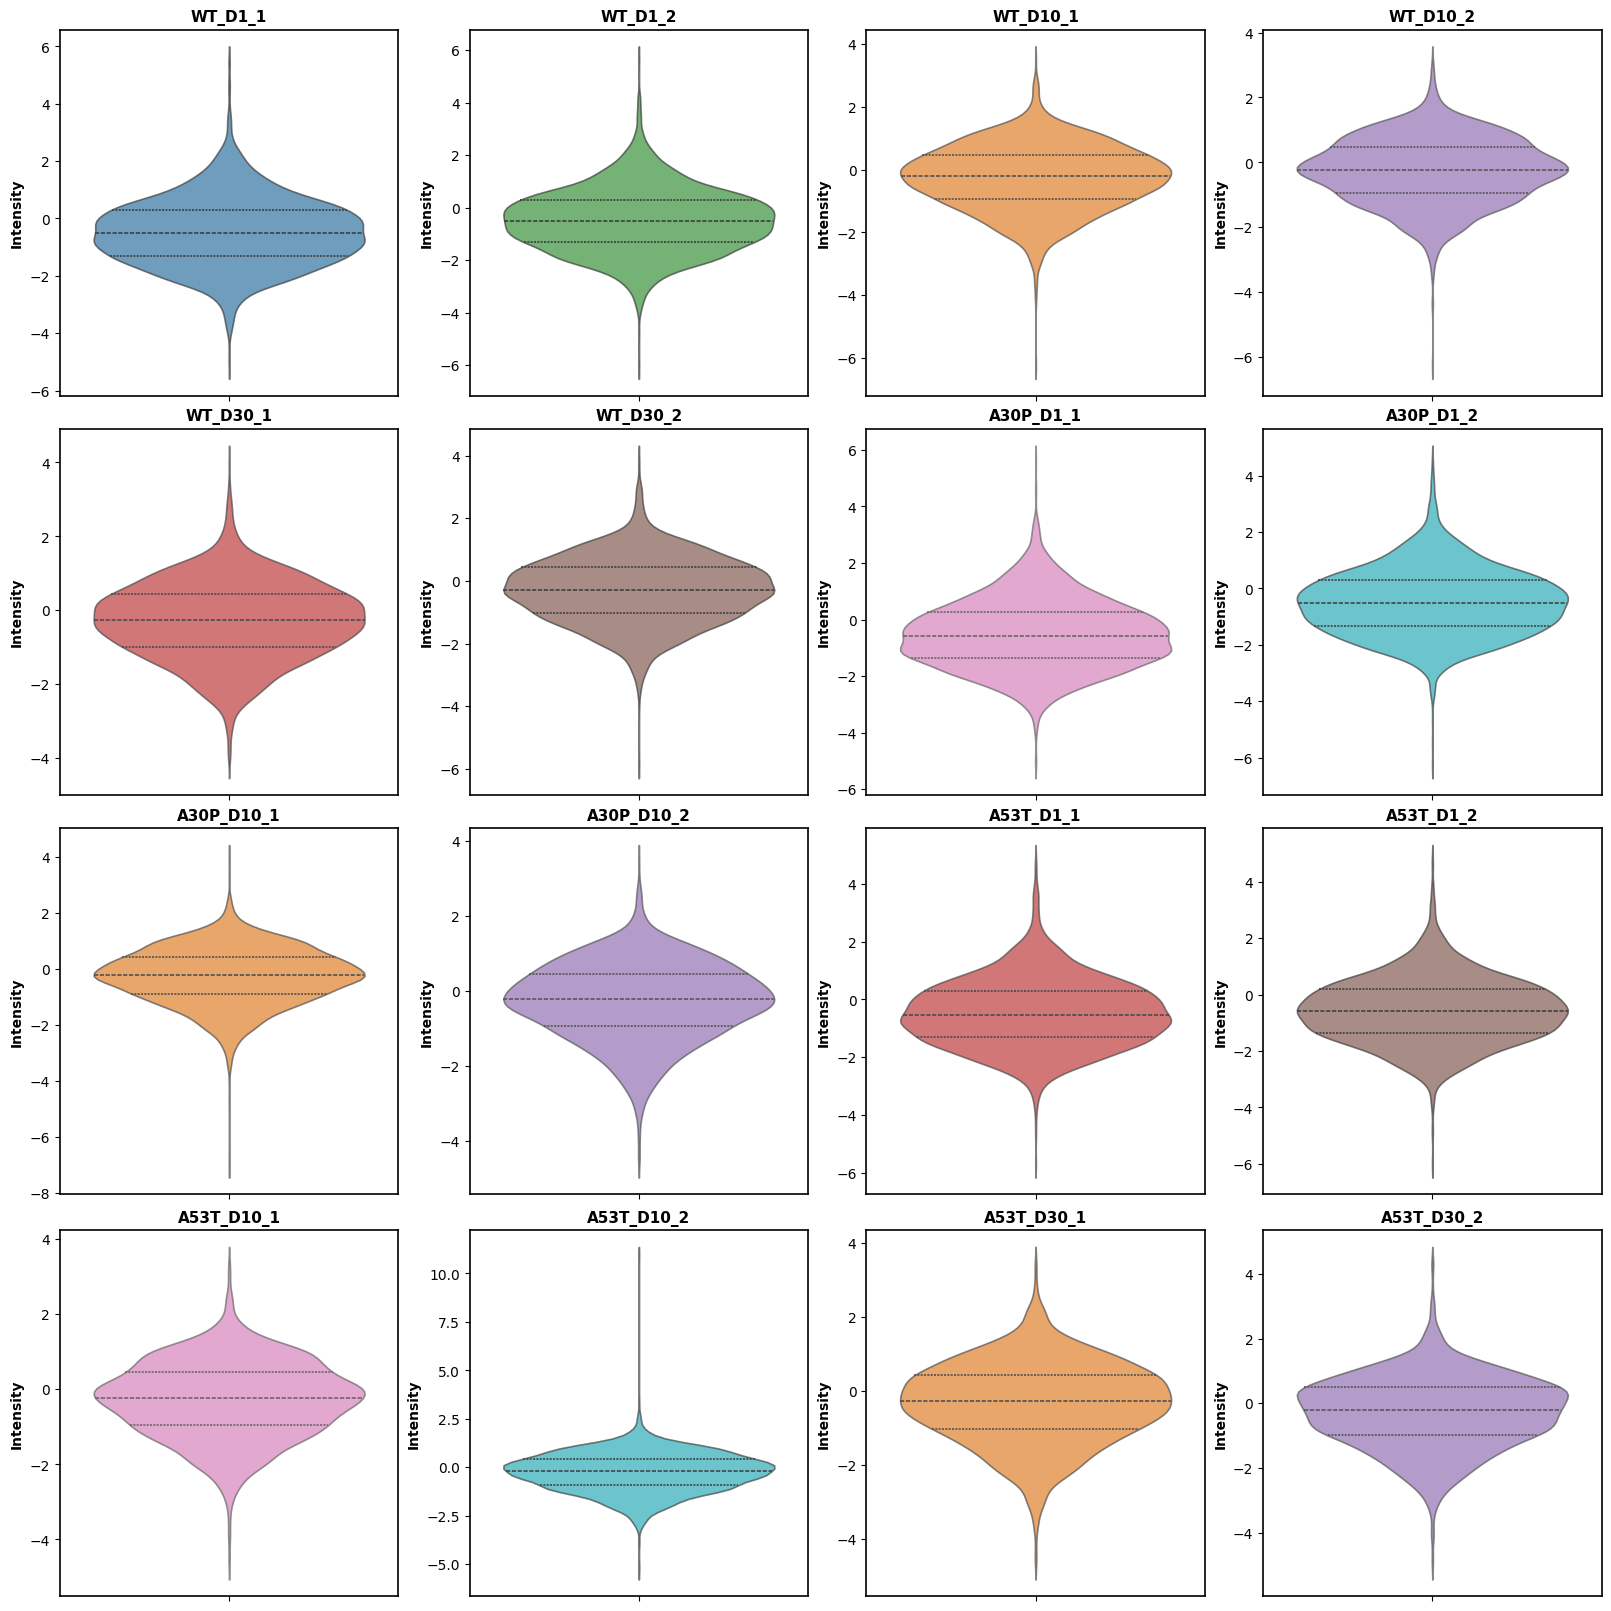

In [13]:
# Create subplots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(16, 16), constrained_layout=True) # Changed nrows to 4 and adjusted figsize
axes = axes.flatten()

# Clean column names in df to ensure proper matching
df.columns = df.columns.str.strip()

# Plot each violin plot
for i, (col, color) in enumerate(zip(conditions, colors)):
    # Clean the condition string to match potentially stripped df column names
    cleaned_col = col.strip()
    sns.violinplot(y=df[cleaned_col], ax=axes[i],
                   color=color,
                   inner='quartile',
                   linewidth=1.2,
                   alpha=0.7)
    axes[i].set_title(f'{cleaned_col}', fontsize=11, fontweight='bold')
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Intensity', fontsize=10,fontweight='bold')
    axes[i].grid(False)

    # Add visible borders
    for spine in axes[i].spines.values():
        spine.set_visible(True)
        spine.set_linewidth(1.2)

#  Remove unused subplots (in case fewer than 16)
for j in range(num_conditions, len(axes)):
    fig.delaxes(axes[j])

#  Save high-resolution images
png_path = 'ViolinPlot_600dpi.png'
pdf_path = 'ViolinPlot.pdf'
plt.savefig(png_path, dpi=600)
plt.savefig(pdf_path)
plt.show()